## Question 1
- Read data from `Crime.csv` then print the names of the columns which have missing values.
- Drop any row that has missing values.
- Which three subcategories have the top three event counts?

In [1]:
#Your Code Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('Crime.csv')
df.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20110000389222,11/29/2001,1200.0,12/03/2011,1314.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI
1,20160000201733,06/01/2004,0.0,06/07/2016,1126.0,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN
2,20060000308915,07/25/2006,1536.0,07/25/2006,1536.0,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE
3,2009000018704,09/30/2007,1530.0,01/15/2009,1820.0,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE
4,2008000054923,09/30/2007,0.0,02/11/2008,1532.0,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE


In [7]:
df = df.replace('UNKNOWN', np.nan)
df

In [4]:
print('Columns with nan and unknown values:')
df.columns[df.isnull().any()]

Columns with nan and unknown values:


Index(['Occurred Date', 'Occurred Time', 'Reported Time', 'Crime Subcategory',
       'Precinct', 'Sector', 'Beat', 'Neighborhood'],
      dtype='object')

In [5]:
#Your Code Here
df.dropna(inplace=True)
df

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20110000389222,11/29/2001,1200.0,12/03/2011,1314.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI
1,20160000201733,06/01/2004,0.0,06/07/2016,1126.0,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN
2,20060000308915,07/25/2006,1536.0,07/25/2006,1536.0,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE
3,2009000018704,09/30/2007,1530.0,01/15/2009,1820.0,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE
4,2008000054923,09/30/2007,0.0,02/11/2008,1532.0,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE
...,...,...,...,...,...,...,...,...,...,...,...
509229,20190000900500,01/14/2019,200.0,01/14/2019,933.0,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q2,QUEEN ANNE
509230,2019000017935,01/14/2019,143.0,01/14/2019,922.0,BURGLARY-COMMERCIAL,BURGLARY-FORCE-NONRES,NORTH,B,B3,WALLINGFORD
509231,2019000017609,01/14/2019,53.0,01/14/2019,54.0,NARCOTIC,NARC-SELL-COCAINE,WEST,D,D1,SLU/CASCADE
509232,2019000017601,01/14/2019,45.0,01/14/2019,45.0,NARCOTIC,NARC-POSSESS-COCAINE,WEST,K,K3,CHINATOWN/INTERNATIONAL DISTRICT


In [6]:
#Your Code Here
print('top three event counts: ')
df.groupby('Crime Subcategory').size().nlargest(3)

top three event counts: 


Crime Subcategory
CAR PROWL          144122
THEFT-ALL OTHER     52388
THEFT-SHOPLIFT      47227
dtype: int64

## Question 2
- Create two new columns (these two columns should be datetime objects):
    - `Occurred DateTime`= `Occurred Date` + `Occurred Time` 
    - `Reported DateTime` = `Reported Date` + `Reported Time` 
- Delete the following columns: `Occurred Date`, `Occurred Time`, `Reported Date`, `Reported Time`

- **Hints**: 
    - The panadas function **pd.to_datetime** can help
    - The loaded Occurred/Reported Time appears to be a float like '1930.0'. This should be interpreted as '19:30:00' eventually

In [7]:
def toTime(time):
    return f"{int(time // 100):02d}:{int(time % 100):02d}"
df['Occurred Time'] = df['Occurred Time'].apply(toTime)
df['Reported Time'] = df['Reported Time'].apply(toTime)
df['Reported Time']

0         13:14
1         11:26
2         15:36
3         18:20
4         15:32
          ...  
509229    09:33
509230    09:22
509231    00:54
509232    00:45
509233    09:40
Name: Reported Time, Length: 505715, dtype: object

In [8]:
#Your Code Here
def toDate(date):
    return date[6:]+'-'+date[:2]+ '-' + date[3:5]
df['Occurred Date'] = df['Occurred Date'].apply(toDate)
df['Reported Date'] = df['Reported Date'].apply(toDate)
df['Reported Date']

0         2011-12-03
1         2016-06-07
2         2006-07-25
3         2009-01-15
4         2008-02-11
             ...    
509229    2019-01-14
509230    2019-01-14
509231    2019-01-14
509232    2019-01-14
509233    2019-01-14
Name: Reported Date, Length: 505715, dtype: object

In [9]:
df['Occurred DateTime'] = pd.to_datetime(df['Occurred Date'] + ' ' + df['Occurred Time'])
df['Reported DateTime'] = pd.to_datetime(df['Reported Date'] + ' ' + df['Reported Time'])
df

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime
0,20110000389222,2001-11-29,12:00,2011-12-03,13:14,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,2001-11-29 12:00:00,2011-12-03 13:14:00
1,20160000201733,2004-06-01,00:00,2016-06-07,11:26,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN,2004-06-01 00:00:00,2016-06-07 11:26:00
2,20060000308915,2006-07-25,15:36,2006-07-25,15:36,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE,2006-07-25 15:36:00,2006-07-25 15:36:00
3,2009000018704,2007-09-30,15:30,2009-01-15,18:20,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE,2007-09-30 15:30:00,2009-01-15 18:20:00
4,2008000054923,2007-09-30,00:00,2008-02-11,15:32,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE,2007-09-30 00:00:00,2008-02-11 15:32:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509229,20190000900500,2019-01-14,02:00,2019-01-14,09:33,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q2,QUEEN ANNE,2019-01-14 02:00:00,2019-01-14 09:33:00
509230,2019000017935,2019-01-14,01:43,2019-01-14,09:22,BURGLARY-COMMERCIAL,BURGLARY-FORCE-NONRES,NORTH,B,B3,WALLINGFORD,2019-01-14 01:43:00,2019-01-14 09:22:00
509231,2019000017609,2019-01-14,00:53,2019-01-14,00:54,NARCOTIC,NARC-SELL-COCAINE,WEST,D,D1,SLU/CASCADE,2019-01-14 00:53:00,2019-01-14 00:54:00
509232,2019000017601,2019-01-14,00:45,2019-01-14,00:45,NARCOTIC,NARC-POSSESS-COCAINE,WEST,K,K3,CHINATOWN/INTERNATIONAL DISTRICT,2019-01-14 00:45:00,2019-01-14 00:45:00


In [10]:
df.drop(columns = ['Occurred Date', 'Occurred Time', 'Reported Date', 'Reported Time'],inplace=True)
df

,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime
0,20110000389222,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,2001-11-29 12:00:00,2011-12-03 13:14:00
1,20160000201733,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN,2004-06-01 00:00:00,2016-06-07 11:26:00
2,20060000308915,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE,2006-07-25 15:36:00,2006-07-25 15:36:00
3,2009000018704,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE,2007-09-30 15:30:00,2009-01-15 18:20:00
4,2008000054923,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE,2007-09-30 00:00:00,2008-02-11 15:32:00
...,...,...,...,...,...,...,...,...,...
509229,20190000900500,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q2,QUEEN ANNE,2019-01-14 02:00:00,2019-01-14 09:33:00
509230,2019000017935,BURGLARY-COMMERCIAL,BURGLARY-FORCE-NONRES,NORTH,B,B3,WALLINGFORD,2019-01-14 01:43:00,2019-01-14 09:22:00
509231,2019000017609,NARCOTIC,NARC-SELL-COCAINE,WEST,D,D1,SLU/CASCADE,2019-01-14 00:53:00,2019-01-14 00:54:00
509232,2019000017601,NARCOTIC,NARC-POSSESS-COCAINE,WEST,K,K3,CHINATOWN/INTERNATIONAL DISTRICT,2019-01-14 00:45:00,2019-01-14 00:45:00


## Question 3

- The crime subcategories are too fine-grained for our analysis. So regroup several subcategories together into 8 major categories: `[Thefts, Burglary, Robbery, Alcohol_Drug, Sex_Related, Homicide, Misc]`

- Construct a mapping dictionary from the subcategories to the corresponding major crime types, then use it by creating a new column called `crime_type`.
mapping dictionary.:
    - For example, we would like to map `CAR PROWL`, `MOTOR VEHICLE THEFT`, ... to `thefts`.
    - We would like to map `ROBBERY-STREET`, `ROBBERY-RESIDENTIAL`,... to `robbery`, etc.
    
**hint**: you can use df[col].map to map a column to values in a dictionary

In [11]:
#Your Code Here
mappingDict={
    'MOTOR VEHICLE THEFT': 'Thefts',
    'THEFT-ALL OTHER': 'Thefts',
    'THEFT-BUILDING': 'Thefts',
    'THEFT-BICYCLE': 'Thefts',
    'THEFT-SHOPLIFT': 'Thefts',
    'BURGLARY-COMMERCIAL': 'Burglary',
    'BURGLARY-RESIDENTIAL-SECURE PARKING': 'Burglary',
    'BURGLARY-COMMERCIAL-SECURE PARKING': 'Burglary',
    'BURGLARY-RESIDENTIAL': 'Burglary',
    'ROBBERY-STREET': 'Robbery',
    'ROBBERY-RESIDENTIAL': 'Robbery',
    'ROBBERY-COMMERCIAL': 'Robbery',
    'LIQUOR LAW VIOLATION': 'Alcohol_Drug',
    'DUI': 'Alcohol_Drug',
    'RAPE': 'Sex_Related',
    'PROSTITUTION': 'Sex_Related',
    'SEX OFFENSE-OTHER': 'Sex_Related',
    'AGGRAVATED ASSAULT-DV': 'Sex_Related',
    'AGGRAVATED ASSAULT': 'Sex_Related',
    'PORNOGRAPHY': 'Sex_Related',
    'HOMICIDE': 'Homicide',
    'CAR PROWL': 'Misc',
    'WEAPON': 'Misc',
    'ARSON': 'Misc',
    'GAMBLE': 'Misc',
    'DISORDERLY CONDUCT': 'Misc',
    'FAMILY OFFENSE-NONVIOLENT': 'Misc',
    'LOITERING': 'Misc'
}
#Your Code Here

In [12]:
#because we dropna(), the index has changed, so we can not have for example [9]
df['crime_type'] = df['Crime Subcategory'].map(mappingDict)
df

,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime,crime_type
0,20110000389222,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,2001-11-29 12:00:00,2011-12-03 13:14:00,Misc
1,20160000201733,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN,2004-06-01 00:00:00,2016-06-07 11:26:00,Thefts
2,20060000308915,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE,2006-07-25 15:36:00,2006-07-25 15:36:00,Sex_Related
3,2009000018704,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE,2007-09-30 15:30:00,2009-01-15 18:20:00,Thefts
4,2008000054923,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE,2007-09-30 00:00:00,2008-02-11 15:32:00,Thefts
...,...,...,...,...,...,...,...,...,...,...
509229,20190000900500,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q2,QUEEN ANNE,2019-01-14 02:00:00,2019-01-14 09:33:00,Misc
509230,2019000017935,BURGLARY-COMMERCIAL,BURGLARY-FORCE-NONRES,NORTH,B,B3,WALLINGFORD,2019-01-14 01:43:00,2019-01-14 09:22:00,Burglary
509231,2019000017609,NARCOTIC,NARC-SELL-COCAINE,WEST,D,D1,SLU/CASCADE,2019-01-14 00:53:00,2019-01-14 00:54:00,NaN
509232,2019000017601,NARCOTIC,NARC-POSSESS-COCAINE,WEST,K,K3,CHINATOWN/INTERNATIONAL DISTRICT,2019-01-14 00:45:00,2019-01-14 00:45:00,NaN


## Question 4
- Compare `visually` the average time gap between **Reported DateTime** vs **Occurred DateTime** of different crimes types.

**Hints**: 
- You can get the time in seconds from datetime column using `df[col_name].dt.total_seconds()`.
- You can convert seconds to datetime usine `pd.to_timedelta(df["sec"], unit='s')`

In [13]:
#Your Code Here
#df['time gap'] = pd.to_timedelta((df['Reported DateTime']-df['Occurred DateTime']).dt.total_seconds(), unit='s')
df['time gap'] = (df['Reported DateTime']-df['Occurred DateTime']).dt.total_seconds()
df['time gap']

0         315882840.0
1         379250760.0
2                 0.0
3          40877400.0
4          11633520.0
             ...     
509229        27180.0
509230        27540.0
509231           60.0
509232            0.0
509233        34800.0
Name: time gap, Length: 505715, dtype: float64

In [14]:
df.groupby('crime_type').mean()['time gap']

crime_type
Alcohol_Drug    2.692143e+05
Burglary        4.498308e+05
Homicide        5.250782e+05
Misc            4.906541e+05
Robbery         1.465914e+05
Sex_Related     2.464800e+06
Thefts          5.678408e+05
Name: time gap, dtype: float64

<AxesSubplot:xlabel='crime_type'>

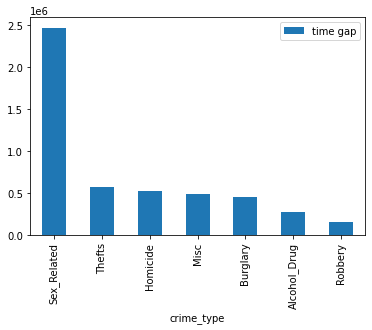

In [15]:
df.groupby('crime_type').mean()['time gap'].sort_values(ascending=False).plot(kind = 'bar', legend=True)

## Question 5
- Show `visually` the top 5 most dangerous neighorhood in the EAST Precinct (with number of crime events in each neighorhood)

In [16]:
#Your Code Here
df_east = df[df['Precinct']=='EAST']
df_east.groupby('Neighborhood').size().nlargest(5)

Neighborhood
CAPITOL HILL                      29908
FIRST HILL                        13510
CENTRAL AREA/SQUIRE PARK          11906
MADRONA/LESCHI                     6413
JUDKINS PARK/NORTH BEACON HILL     4025
dtype: int64

<AxesSubplot:xlabel='Neighborhood'>

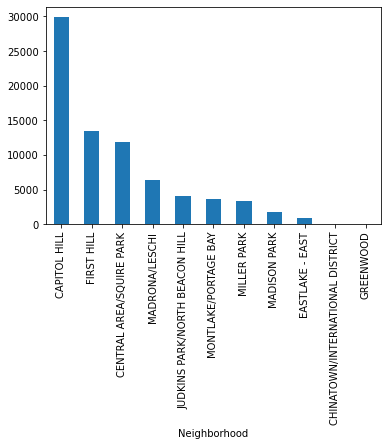

In [17]:
df_east.groupby('Neighborhood').size().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Neighborhood'>

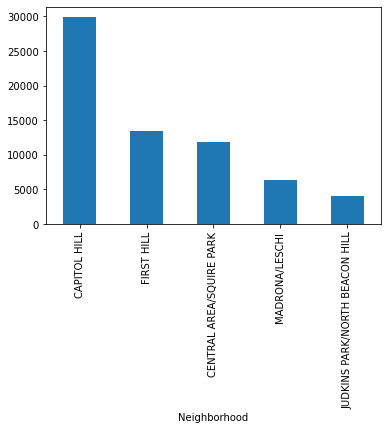

In [18]:
df_east.groupby('Neighborhood').size().nlargest(5).plot(kind='bar')

## Question 6
- Create column called **year** that shows the year of the crime. Which year has the lowest and highest crime event counts, respectively?
- Plot the number of `Thefts` crimes in the last ten years

In [19]:
#Your Code Here
#df['year'] = [i.year for i in df['Occurred DateTime']]
#df['year'] = df['Occurred DateTime'].dt.strftime('%Y')
df['year'] = df['Occurred DateTime'].dt.year
df['year']

0         2001
1         2004
2         2006
3         2007
4         2007
          ... 
509229    2019
509230    2019
509231    2019
509232    2019
509233    2019
Name: year, Length: 505715, dtype: int64

In [20]:
df.groupby('year').size().sort_values()

year
1908        1
1964        1
1973        1
1975        1
1978        1
1980        1
1985        1
1986        1
1988        1
1989        1
1979        2
1981        2
1991        2
1994        2
1997        3
1996        3
1999        5
1993        5
1995        5
2002       15
1998       18
2003       25
2000       33
2004       36
2005       40
2001       49
2006       92
2007      601
2019     1554
2012    40764
2011    41014
2008    42263
2010    43032
2009    44729
2013    45258
2015    47487
2016    48949
2014    49095
2017    49947
2018    50675
dtype: int64

In [21]:
print('highest year: '+ str(df['year'].value_counts().idxmax()))

highest year: 2018


In [22]:
m = df.groupby('year').size().sort_values().min()
print('lowest crime count: '+str(min))
print('lowest year: ')
l = df.groupby('year').size().sort_values()
l[l==m]

lowest crime count: <built-in function min>
lowest year: 


year
1908    1
1964    1
1973    1
1975    1
1978    1
1980    1
1985    1
1986    1
1988    1
1989    1
dtype: int64

In [23]:
#Your Code Here
df_theft = df[df['crime_type']=='Thefts']
df_theft.groupby('year').size()[-10:]

year
2010    14129
2011    14014
2012    15289
2013    16405
2014    18199
2015    16409
2016    16383
2017    16351
2018    17319
2019      483
dtype: int64

<AxesSubplot:title={'center':'theft cases in 2010-2019'}, xlabel='year', ylabel='crime cases'>

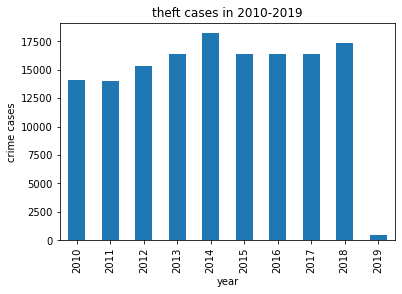

In [24]:
df_theft.groupby('year').size()[-10:].plot(kind='bar', title = 'theft cases in 2010-2019', ylabel = 'crime cases')

## Question 7
- keep only crime events occurred in-between **2008-2018** (remove all other crimes).
- Show `visually` which crime type has the highest percentage of events

In [25]:
#Your Code Here
df_new = df[(df['year']>=2008) & (df['year']<=2018)]
df_new

,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime,crime_type,time gap,year
11,2008000013991,CAR PROWL,THEFT-CARPROWL,NORTH,N,N1,BITTERLAKE,2008-01-01 00:30:00,2008-01-11 17:53:00,Misc,926580.0,2008
12,20080000474,THEFT-BUILDING,THEFT-BUILDING,EAST,E,E1,CAPITOL HILL,2008-01-01 00:30:00,2008-01-01 09:13:00,Thefts,31380.0,2008
13,2008000060,DUI,DUI-LIQUOR,WEST,Q,Q3,SLU/CASCADE,2008-01-01 00:10:00,2008-01-01 00:10:00,Alcohol_Drug,0.0,2008
14,200800002278,NARCOTIC,NARC-POSSESS-COCAINE,WEST,D,D1,BELLTOWN,2008-01-02 20:00:00,2008-01-02 20:00:00,NaN,0.0,2008
15,200800008276,CAR PROWL,THEFT-AUTOACC,WEST,Q,Q2,QUEEN ANNE,2008-01-04 11:00:00,2008-01-07 16:02:00,Misc,277320.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
507664,20190000900012,THEFT-ALL OTHER,THEFT-OTH,SOUTHWEST,W,W2,ALASKA JUNCTION,2018-12-31 00:00:00,2019-01-01 13:38:00,Thefts,135480.0,2018
507665,20190000900013,CAR PROWL,THEFT-CARPROWL,EAST,G,G1,FIRST HILL,2018-12-31 00:00:00,2019-01-01 13:44:00,Misc,135840.0,2018
507666,201900001871,THEFT-ALL OTHER,THEFT-OTH,EAST,E,E2,CAPITOL HILL,2018-12-31 00:00:00,2019-01-02 15:00:00,Thefts,226800.0,2018
507667,20190000900413,THEFT-ALL OTHER,THEFT-OTH,NORTH,U,U1,UNIVERSITY,2018-12-31 00:00:00,2019-01-11 14:34:00,Thefts,1002840.0,2018


In [26]:
#Your Code Here
df_new.groupby('crime_type').size()

crime_type
Alcohol_Drug     13903
Burglary         77701
Homicide           261
Misc            156228
Robbery          16908
Sex_Related      32391
Thefts          172888
dtype: int64

<AxesSubplot:>

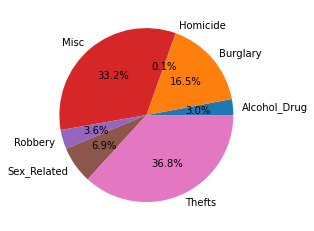

In [27]:
df_new.groupby('crime_type').size().plot(kind = 'pie',autopct='%1.1f%%', ylabel='')

## Question 8
- Analyze the crime prevalence in terms of week days (create column called `day` that specifies the day of the crime).
- Which weekday (Sunday, Monday, ....Saturday) has highest/lowest daily Homicide crime count? (Visualize your findings)

**Hint:** use `.day_name()` with time object to get the day

In [28]:
#Your Code Here
df_new['weekdays'] = df_new['Occurred DateTime'].dt.day_name()
df_new

/var/folders/3y/jh01kr7x6kj5gsrldxy4w_r40000gn/T/ipykernel_10642/3568650243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['weekdays'] = df_new['Occurred DateTime'].dt.day_name()


,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime,crime_type,time gap,year,weekdays
11,2008000013991,CAR PROWL,THEFT-CARPROWL,NORTH,N,N1,BITTERLAKE,2008-01-01 00:30:00,2008-01-11 17:53:00,Misc,926580.0,2008,Tuesday
12,20080000474,THEFT-BUILDING,THEFT-BUILDING,EAST,E,E1,CAPITOL HILL,2008-01-01 00:30:00,2008-01-01 09:13:00,Thefts,31380.0,2008,Tuesday
13,2008000060,DUI,DUI-LIQUOR,WEST,Q,Q3,SLU/CASCADE,2008-01-01 00:10:00,2008-01-01 00:10:00,Alcohol_Drug,0.0,2008,Tuesday
14,200800002278,NARCOTIC,NARC-POSSESS-COCAINE,WEST,D,D1,BELLTOWN,2008-01-02 20:00:00,2008-01-02 20:00:00,NaN,0.0,2008,Wednesday
15,200800008276,CAR PROWL,THEFT-AUTOACC,WEST,Q,Q2,QUEEN ANNE,2008-01-04 11:00:00,2008-01-07 16:02:00,Misc,277320.0,2008,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507664,20190000900012,THEFT-ALL OTHER,THEFT-OTH,SOUTHWEST,W,W2,ALASKA JUNCTION,2018-12-31 00:00:00,2019-01-01 13:38:00,Thefts,135480.0,2018,Monday
507665,20190000900013,CAR PROWL,THEFT-CARPROWL,EAST,G,G1,FIRST HILL,2018-12-31 00:00:00,2019-01-01 13:44:00,Misc,135840.0,2018,Monday
507666,201900001871,THEFT-ALL OTHER,THEFT-OTH,EAST,E,E2,CAPITOL HILL,2018-12-31 00:00:00,2019-01-02 15:00:00,Thefts,226800.0,2018,Monday
507667,20190000900413,THEFT-ALL OTHER,THEFT-OTH,NORTH,U,U1,UNIVERSITY,2018-12-31 00:00:00,2019-01-11 14:34:00,Thefts,1002840.0,2018,Monday


In [29]:
#Your Code Here
df_new_homicide = df_new[df_new['crime_type']=='Homicide']
df_new_homicide.head()

,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime,crime_type,time gap,year,weekdays
1994,2012000035186,HOMICIDE,HOMICIDE-PREMEDITATED-GUN,SOUTH,O,O1,SODO,2012-02-05 01:45:00,2012-02-05 03:31:00,Homicide,6360.0,2012,Sunday
4863,200800003878,HOMICIDE,HOMICIDE-PREMEDITATED-GUN,WEST,Q,Q3,QUEEN ANNE,2008-01-03 23:30:00,2008-01-03 23:48:00,Homicide,1080.0,2008,Thursday
5631,2008000013795,HOMICIDE,HOMICIDE-PREMEDITATED-GUN,SOUTH,S,S2,BRIGHTON/DUNLAP,2008-01-10 20:10:00,2008-01-11 14:41:00,Homicide,66660.0,2008,Thursday
6460,2008000024117,HOMICIDE,HOMICIDE-PREMEDITATED-BODYFORCE,WEST,K,K1,DOWNTOWN COMMERCIAL,2008-01-18 21:14:00,2008-01-18 21:14:00,Homicide,0.0,2008,Friday
7332,2008000034899,HOMICIDE,HOMICIDE-PREMEDITATED-GUN,SOUTH,S,S3,RAINIER VIEW,2008-01-26 23:34:00,2008-01-26 23:34:00,Homicide,0.0,2008,Saturday


In [30]:
df_new_homicide.groupby('weekdays').size().nlargest(7)

weekdays
Sunday       52
Saturday     42
Thursday     38
Friday       36
Monday       34
Wednesday    33
Tuesday      26
dtype: int64

In [31]:
print('highest: '+ str(df_new_homicide.groupby('weekdays').size().idxmax()))
print('lowest: '+ str(df_new_homicide.groupby('weekdays').size().idxmin()))
      

highest: Sunday
lowest: Tuesday


<AxesSubplot:xlabel='weekdays', ylabel='crime cases'>

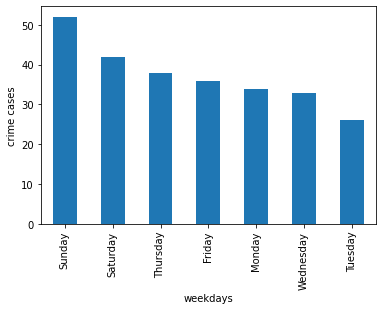

In [32]:
df_new_homicide.groupby('weekdays').size().sort_values(ascending=False).plot(kind='bar',ylabel='crime cases')

## Question 9

- Compare `visually` the number of Alcohol_Drug crimes in each day. Which day has the highest number of Alcohol_Drug crimes?
- Show `visually` the evolve of Burglary crimes through the years.

In [33]:
#Your Code Here
#weekdays
df_new_drug = df_new[df_new['crime_type']=='Alcohol_Drug']
df_new_drug

,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime,crime_type,time gap,year,weekdays
13,2008000060,DUI,DUI-LIQUOR,WEST,Q,Q3,SLU/CASCADE,2008-01-01 00:10:00,2008-01-01 00:10:00,Alcohol_Drug,0.0,2008,Tuesday
20,200800006757,DUI,DUI-LIQUOR,SOUTHWEST,W,W2,ALASKA JUNCTION,2008-01-06 02:50:00,2008-01-06 02:50:00,Alcohol_Drug,0.0,2008,Sunday
36,2008000014406,DUI,DUI-LIQUOR,EAST,G,G3,MADRONA/LESCHI,2008-01-11 22:25:00,2008-01-11 22:25:00,Alcohol_Drug,0.0,2008,Friday
37,2008000014403,DUI,DUI-LIQUOR,NORTH,B,B1,BALLARD SOUTH,2008-01-11 22:18:00,2008-01-11 22:18:00,Alcohol_Drug,0.0,2008,Friday
43,2008000021276,DUI,DUI-LIQUOR,SOUTHWEST,W,W3,MORGAN,2008-01-16 22:32:00,2008-01-16 22:32:00,Alcohol_Drug,0.0,2008,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507535,20180000485085,DUI,DUI-LIQUOR,EAST,G,G3,MADRONA/LESCHI,2018-12-30 01:22:00,2018-12-30 01:22:00,Alcohol_Drug,0.0,2018,Sunday
507560,20180000487186,DUI,DUI-LIQUOR,EAST,E,E2,CAPITOL HILL,2018-12-31 21:14:00,2018-12-31 22:52:00,Alcohol_Drug,5880.0,2018,Monday
507577,20180000487023,DUI,DUI-LIQUOR,SOUTH,S,S1,NEW HOLLY,2018-12-31 17:58:00,2018-12-31 17:58:00,Alcohol_Drug,0.0,2018,Monday
507649,20180000486316,DUI,DUI-DRUGS,SOUTHWEST,W,W1,NORTH ADMIRAL,2018-12-31 06:57:00,2018-12-31 14:54:00,Alcohol_Drug,28620.0,2018,Monday


In [34]:
#Your Code Here
#df_new_drug['date'] = df_new_drug['Occurred DateTime'].dt.date
#df_new_drug['date']

<AxesSubplot:xlabel='weekdays', ylabel='crime cases'>

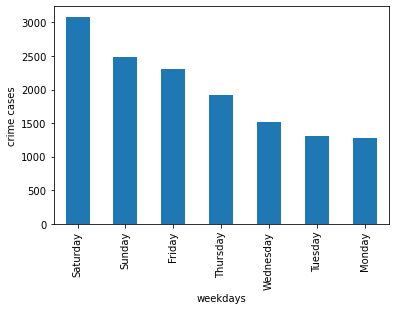

In [35]:
df_new_drug.groupby('weekdays').size().sort_values(ascending=False).plot(kind='bar',ylabel='crime cases')


In [36]:
print('The highest day:')
df_new_drug.groupby('weekdays').size().nlargest(1)

The highest day:


weekdays
Saturday    3083
dtype: int64

<AxesSubplot:xlabel='year', ylabel='crime cases'>

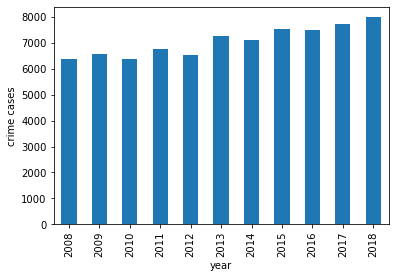

In [37]:
df_new_bur = df_new[df_new['crime_type']=='Burglary']
df_new_bur.groupby('year').size().plot(kind='bar',ylabel = 'crime cases')

## Extra Credit Questions

- Consider the 24 hours window into 6 frames '12am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am'. Create a column called `Occured TimeFrame` that contains the crime occurred time frame.

- Compare `visually` time-frames in term of the number of crimes.
- Print the name of the most dangerous neighborhood in the WEST Precinct, Then Show `visually` the percentages of crimes during different TimeFrames in that neighborhood

In [38]:
df_new['hour'] = df_new['Occurred DateTime'].dt.hour
df_new

/var/folders/3y/jh01kr7x6kj5gsrldxy4w_r40000gn/T/ipykernel_10642/1824384839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['hour'] = df_new['Occurred DateTime'].dt.hour


,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime,crime_type,time gap,year,weekdays,hour
11,2008000013991,CAR PROWL,THEFT-CARPROWL,NORTH,N,N1,BITTERLAKE,2008-01-01 00:30:00,2008-01-11 17:53:00,Misc,926580.0,2008,Tuesday,0
12,20080000474,THEFT-BUILDING,THEFT-BUILDING,EAST,E,E1,CAPITOL HILL,2008-01-01 00:30:00,2008-01-01 09:13:00,Thefts,31380.0,2008,Tuesday,0
13,2008000060,DUI,DUI-LIQUOR,WEST,Q,Q3,SLU/CASCADE,2008-01-01 00:10:00,2008-01-01 00:10:00,Alcohol_Drug,0.0,2008,Tuesday,0
14,200800002278,NARCOTIC,NARC-POSSESS-COCAINE,WEST,D,D1,BELLTOWN,2008-01-02 20:00:00,2008-01-02 20:00:00,NaN,0.0,2008,Wednesday,20
15,200800008276,CAR PROWL,THEFT-AUTOACC,WEST,Q,Q2,QUEEN ANNE,2008-01-04 11:00:00,2008-01-07 16:02:00,Misc,277320.0,2008,Friday,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507664,20190000900012,THEFT-ALL OTHER,THEFT-OTH,SOUTHWEST,W,W2,ALASKA JUNCTION,2018-12-31 00:00:00,2019-01-01 13:38:00,Thefts,135480.0,2018,Monday,0
507665,20190000900013,CAR PROWL,THEFT-CARPROWL,EAST,G,G1,FIRST HILL,2018-12-31 00:00:00,2019-01-01 13:44:00,Misc,135840.0,2018,Monday,0
507666,201900001871,THEFT-ALL OTHER,THEFT-OTH,EAST,E,E2,CAPITOL HILL,2018-12-31 00:00:00,2019-01-02 15:00:00,Thefts,226800.0,2018,Monday,0
507667,20190000900413,THEFT-ALL OTHER,THEFT-OTH,NORTH,U,U1,UNIVERSITY,2018-12-31 00:00:00,2019-01-11 14:34:00,Thefts,1002840.0,2018,Monday,0


In [39]:
def timeFrame(t):
    if(t >= 0 and t < 4):
        return "12am-4am"
    if(t >= 4 and t < 8):
        return "4am-8am"
    if(t >= 8 and t < 12):
        return "8am-12pm"
    if(t >= 12 and t < 16):
        return "12pm-4pm"
    if(t >= 16 and t < 20):
        return "4pm-8pm"
    if(t >= 20 and t < 24):
        return "8pm-12pm"
df_new['Occurred TimeFrame'] = df_new['hour'].apply(timeFrame)
df_new

/var/folders/3y/jh01kr7x6kj5gsrldxy4w_r40000gn/T/ipykernel_10642/2650926237.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Occurred TimeFrame'] = df_new['hour'].apply(timeFrame)


,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime,crime_type,time gap,year,weekdays,hour,Occurred TimeFrame
11,2008000013991,CAR PROWL,THEFT-CARPROWL,NORTH,N,N1,BITTERLAKE,2008-01-01 00:30:00,2008-01-11 17:53:00,Misc,926580.0,2008,Tuesday,0,12am-4am
12,20080000474,THEFT-BUILDING,THEFT-BUILDING,EAST,E,E1,CAPITOL HILL,2008-01-01 00:30:00,2008-01-01 09:13:00,Thefts,31380.0,2008,Tuesday,0,12am-4am
13,2008000060,DUI,DUI-LIQUOR,WEST,Q,Q3,SLU/CASCADE,2008-01-01 00:10:00,2008-01-01 00:10:00,Alcohol_Drug,0.0,2008,Tuesday,0,12am-4am
14,200800002278,NARCOTIC,NARC-POSSESS-COCAINE,WEST,D,D1,BELLTOWN,2008-01-02 20:00:00,2008-01-02 20:00:00,NaN,0.0,2008,Wednesday,20,8pm-12pm
15,200800008276,CAR PROWL,THEFT-AUTOACC,WEST,Q,Q2,QUEEN ANNE,2008-01-04 11:00:00,2008-01-07 16:02:00,Misc,277320.0,2008,Friday,11,8am-12pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507664,20190000900012,THEFT-ALL OTHER,THEFT-OTH,SOUTHWEST,W,W2,ALASKA JUNCTION,2018-12-31 00:00:00,2019-01-01 13:38:00,Thefts,135480.0,2018,Monday,0,12am-4am
507665,20190000900013,CAR PROWL,THEFT-CARPROWL,EAST,G,G1,FIRST HILL,2018-12-31 00:00:00,2019-01-01 13:44:00,Misc,135840.0,2018,Monday,0,12am-4am
507666,201900001871,THEFT-ALL OTHER,THEFT-OTH,EAST,E,E2,CAPITOL HILL,2018-12-31 00:00:00,2019-01-02 15:00:00,Thefts,226800.0,2018,Monday,0,12am-4am
507667,20190000900413,THEFT-ALL OTHER,THEFT-OTH,NORTH,U,U1,UNIVERSITY,2018-12-31 00:00:00,2019-01-11 14:34:00,Thefts,1002840.0,2018,Monday,0,12am-4am


In [40]:
#Your Code Here
df_new.groupby('Occurred TimeFrame').size()

Occurred TimeFrame
12am-4am     70368
12pm-4pm     99207
4am-8am      33550
4pm-8pm     117812
8am-12pm     68973
8pm-12pm    113303
dtype: int64

<AxesSubplot:xlabel='Occurred TimeFrame', ylabel='crime cases'>

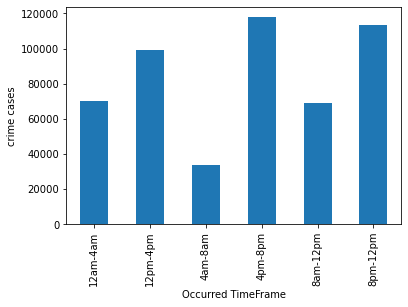

In [41]:
df_new.groupby('Occurred TimeFrame').size().plot(kind='bar',ylabel = 'crime cases')

In [42]:
#Your Code Here
print('most dangerous neighbour in the west:')
df_west = df_new[df_new['Precinct']=='WEST']
df_west.groupby('Neighborhood').size().nlargest(1)

most dangerous neighbour in the west:


Neighborhood
DOWNTOWN COMMERCIAL    47374
dtype: int64

In [43]:
#Your Code Here
df_west_dt = df_west = df_new[df_new['Neighborhood']=='DOWNTOWN COMMERCIAL']
df_west_dt.head()

,Report Number,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime,crime_type,time gap,year,weekdays,hour,Occurred TimeFrame
22,200800008169,TRESPASS,TRESPASS,WEST,M,M1,DOWNTOWN COMMERCIAL,2008-01-07 11:32:00,2008-01-07 11:32:00,NaN,0.0,2008,Monday,11,8am-12pm
274,20080000318268,TRESPASS,TRESPASS,WEST,K,K2,DOWNTOWN COMMERCIAL,2008-08-26 11:20:00,2008-08-26 12:07:00,NaN,2820.0,2008,Tuesday,11,8am-12pm
280,20080000328286,TRESPASS,TRESPASS,WEST,K,K2,DOWNTOWN COMMERCIAL,2008-09-02 15:20:00,2008-09-02 15:20:00,NaN,0.0,2008,Tuesday,15,12pm-4pm
282,20080000331749,TRESPASS,TRESPASS,WEST,K,K2,DOWNTOWN COMMERCIAL,2008-09-04 22:41:00,2008-09-04 23:42:00,NaN,3660.0,2008,Thursday,22,8pm-12pm
344,20080000390112,DUI,DUI-LIQUOR,WEST,K,K1,DOWNTOWN COMMERCIAL,2008-10-17 02:17:00,2008-10-17 02:17:00,Alcohol_Drug,0.0,2008,Friday,2,12am-4am


In [44]:
df_west_dt.groupby('Occurred TimeFrame').size()#.plot(kind = 'pie')

Occurred TimeFrame
12am-4am     3620
12pm-4pm    12768
4am-8am      2360
4pm-8pm     12947
8am-12pm     7566
8pm-12pm     8113
dtype: int64

<AxesSubplot:>

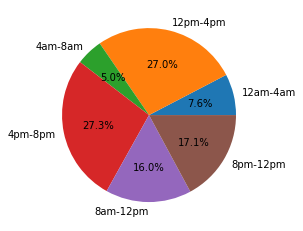

In [45]:
df_west_dt.groupby('Occurred TimeFrame').size().plot(kind = 'pie',autopct='%1.1f%%', ylabel='')